In [35]:
import numpy as np
import pandas as pd
import os
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [36]:
test = pd.read_csv('hmnist_28_28_RGB.csv')

test.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [37]:
cancer_dict = {
    0: 'Actinic keratoses',
    1: 'Basal cell carcinoma',
    2: 'Benign keratosis-like lesions ',
    3: 'Dermatofibroma',
    4: 'Melanocytic nevi',
    5: 'Vascular lesions',
    6: 'Melanoma',   
}

In [38]:
#input_shape = (28,28,3)
X = test.iloc[:,0:-1]
Y = test.iloc[:,-1]

In [39]:
X.shape, Y.shape

((10015, 2352), (10015,))

In [40]:
X = np.array(X)
Y = np.array(Y)


In [41]:
X = X.reshape(X.shape[0],28,28,3)

In [42]:
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.1,random_state=13)

In [43]:
trainX = trainX.astype('float64') / 255.0
testX =  testX.astype('float64') / 255.0

In [44]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [45]:
from keras.layers import Flatten, Dense, Activation, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import load_model, Sequential
from keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
    return model

model = create_model()

datagen.fit(trainX)

filepath = 'cancer.model'

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=3, verbose=1, mode='max', min_lr=0.0001)

callbacks_list = [checkpoint, reduce_lr]


In [46]:

history= model.fit(trainX, trainY,
          batch_size=32,
          epochs=100,
          verbose=1,
          validation_data=(testX, testY),shuffle=True)

Train on 9013 samples, validate on 1002 samples
Epoch 1/100
9013/9013 [==============================] - 47s 5ms/step - loss: 1.4582 - acc: 0.5713 - val_loss: 3.0580 - val_acc: 0.6487
Epoch 2/100
9013/9013 [==============================] - 48s 5ms/step - loss: 0.9396 - acc: 0.6758 - val_loss: 1.4674 - val_acc: 0.4940
Epoch 3/100
9013/9013 [==============================] - 45s 5ms/step - loss: 0.8384 - acc: 0.7068 - val_loss: 1.1601 - val_acc: 0.6537
Epoch 4/100
9013/9013 [==============================] - 43s 5ms/step - loss: 0.7700 - acc: 0.7216 - val_loss: 0.9672 - val_acc: 0.6347
Epoch 5/100
9013/9013 [==============================] - 43s 5ms/step - loss: 0.7359 - acc: 0.7303 - val_loss: 1.3127 - val_acc: 0.6567
Epoch 6/100
9013/9013 [==============================] - 43s 5ms/step - loss: 0.7076 - acc: 0.7433 - val_loss: 1.4169 - val_acc: 0.6597
Epoch 7/100
9013/9013 [==============================] - 47s 5ms/step - loss: 0.6881 - acc: 0.7497 - val_loss: 0.8045 - val_acc: 0.6926


9013/9013 [==============================] - 44s 5ms/step - loss: 0.1263 - acc: 0.9564 - val_loss: 2.0673 - val_acc: 0.6307
Epoch 61/100
9013/9013 [==============================] - 46s 5ms/step - loss: 0.1285 - acc: 0.9550 - val_loss: 2.0272 - val_acc: 0.6986
Epoch 62/100
9013/9013 [==============================] - 45s 5ms/step - loss: 0.1244 - acc: 0.9567 - val_loss: 1.0443 - val_acc: 0.7525
Epoch 63/100
9013/9013 [==============================] - 45s 5ms/step - loss: 0.1190 - acc: 0.9609 - val_loss: 0.9419 - val_acc: 0.7695
Epoch 64/100
9013/9013 [==============================] - 42s 5ms/step - loss: 0.1241 - acc: 0.9575 - val_loss: 1.3265 - val_acc: 0.7216
Epoch 65/100
9013/9013 [==============================] - 46s 5ms/step - loss: 0.1156 - acc: 0.9597 - val_loss: 1.2597 - val_acc: 0.7535
Epoch 66/100
9013/9013 [==============================] - 44s 5ms/step - loss: 0.0991 - acc: 0.9666 - val_loss: 1.3161 - val_acc: 0.7535
Epoch 67/100
9013/9013 [==============================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


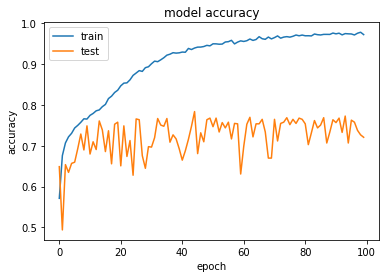

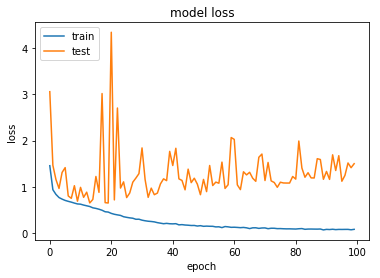

In [47]:
import matplotlib.pyplot as plt
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
# model.save('cancer.model')

In [24]:
pred = model.predict(trainX)
from sklearn.metrics import accuracy_score

In [25]:
pred

array([[1.0852193e-07, 5.4925949e-06, 2.4780605e-03, ..., 9.9667573e-01,
        1.1739666e-06, 8.3939312e-04],
       [1.3570501e-02, 4.6158205e-03, 1.3310739e-01, ..., 7.1877074e-01,
        2.4085413e-04, 1.2966865e-01],
       [2.5484660e-03, 5.9781078e-04, 6.6236180e-01, ..., 1.1340098e-01,
        1.4139320e-04, 2.2091237e-01],
       ...,
       [1.9313566e-06, 2.6696857e-06, 1.7873019e-02, ..., 9.8147571e-01,
        2.0473994e-06, 6.4439367e-04],
       [1.5236954e-04, 1.8963608e-05, 5.8117205e-01, ..., 4.1775966e-01,
        5.1849702e-06, 8.9050812e-04],
       [5.6763714e-05, 4.0096143e-05, 9.8897189e-01, ..., 1.0536338e-02,
        2.0300665e-06, 3.9287499e-04]], dtype=float32)

In [26]:
trainX[152]

array([[[0.2627451 , 0.12941176, 0.15294118],
        [0.42745098, 0.24313725, 0.25490196],
        [0.5372549 , 0.34117647, 0.35686275],
        ...,
        [0.45882353, 0.25098039, 0.27058824],
        [0.32156863, 0.15686275, 0.16862745],
        [0.14117647, 0.06666667, 0.07843137]],

       [[0.36470588, 0.2       , 0.21176471],
        [0.48627451, 0.27058824, 0.26666667],
        [0.55686275, 0.33333333, 0.34117647],
        ...,
        [0.50588235, 0.29803922, 0.32156863],
        [0.39607843, 0.2       , 0.19607843],
        [0.25098039, 0.11764706, 0.1254902 ]],

       [[0.44705882, 0.25098039, 0.26666667],
        [0.54509804, 0.33333333, 0.34117647],
        [0.59215686, 0.38039216, 0.41176471],
        ...,
        [0.53333333, 0.31372549, 0.3372549 ],
        [0.47058824, 0.2745098 , 0.28235294],
        [0.34901961, 0.18823529, 0.20392157]],

       ...,

       [[0.44313725, 0.29411765, 0.32941176],
        [0.54901961, 0.39215686, 0.41960784],
        [0.59607843, 0

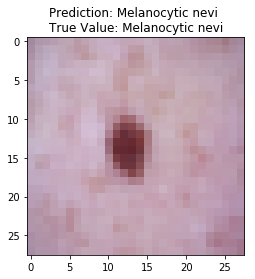

In [33]:

testsub =2558
plt.imshow(trainX[testsub].reshape(28,28,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(cancer_dict[np.argmax(pred[testsub])], cancer_dict[np.argmax(trainY[testsub])]))
plt.show()